# Testing the "accept_noaccidental" flag
Having now confirmed that the input output tests find issues when the "accept" flag is used, then the next step is to remove some reality and use the "noaccidental" flag. Accept would use the thrown *final state* 4-vectors, but the beam 4-vector was the kinematically fit values, and out of time beam photons were included and RF subtraction was applied. Adding the no_accidental flag removes out of time beam photons, and only uses the photon that actually generated the event.

In [1]:
import pandas as pd

from pathlib import Path
import sys, os
parent_dir = str(Path().resolve().parents[3])
sys.path.insert(0, parent_dir)
import analysis.scripts.pwa_tools as pwa_tools

## Randomized Fits
As usual by now, lets start off with the randomized fits

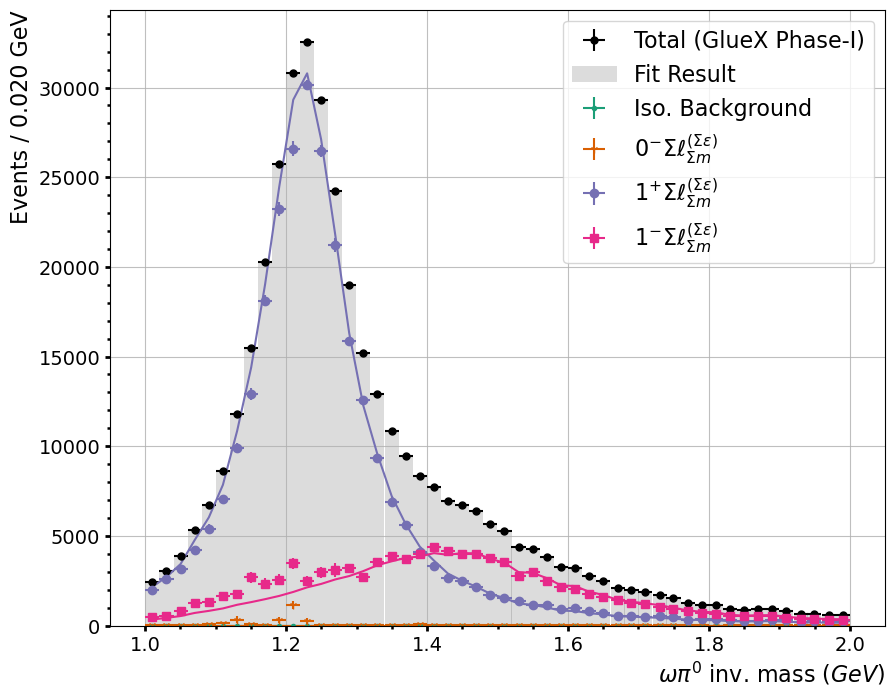

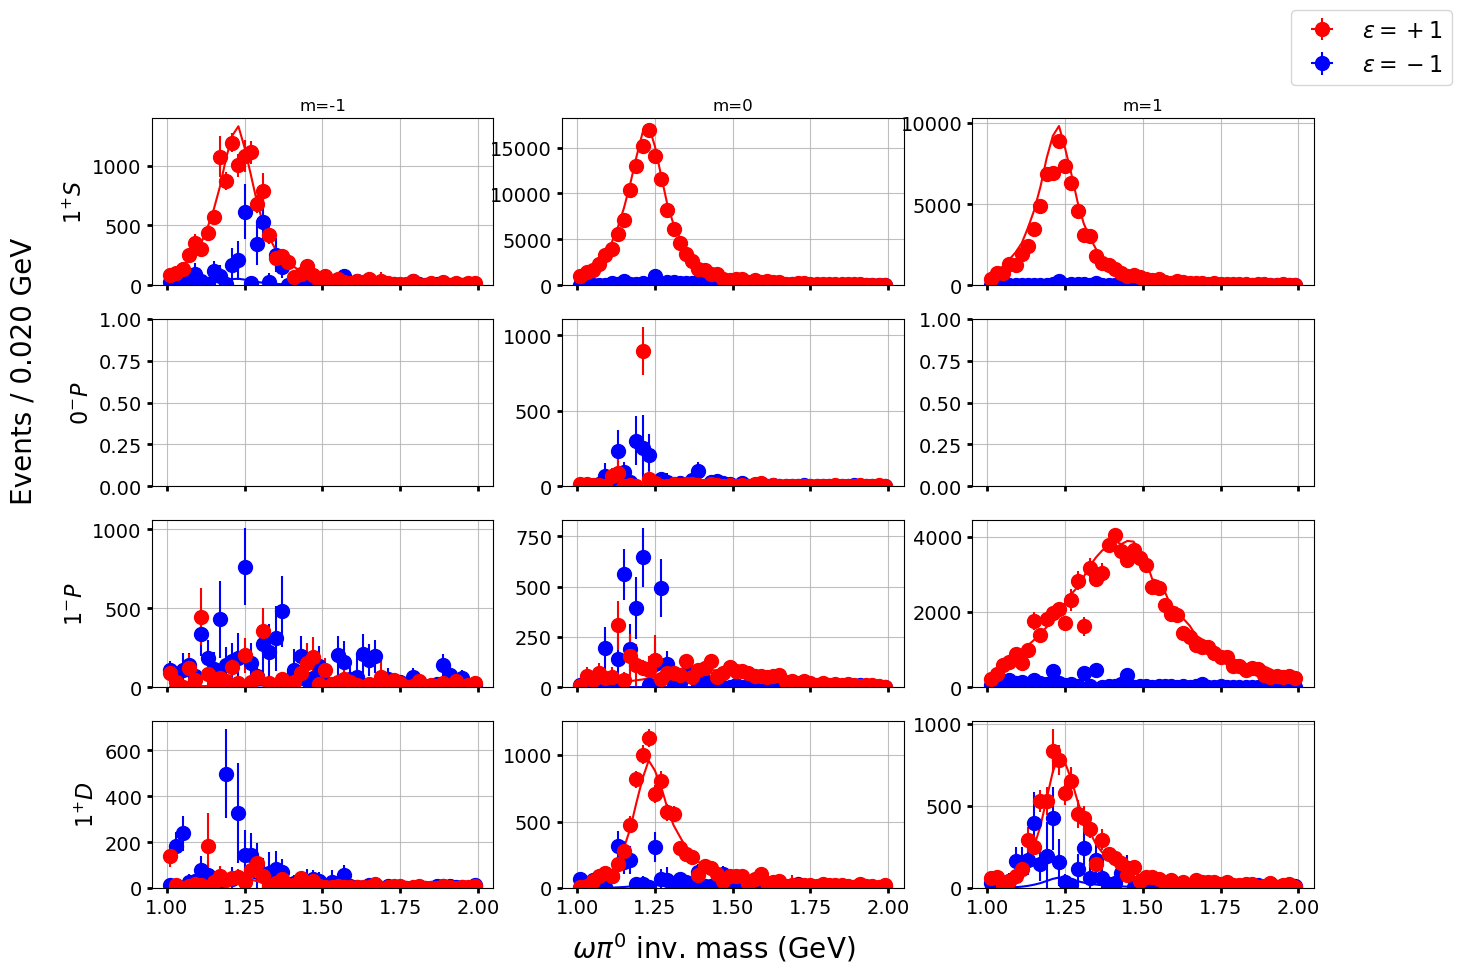

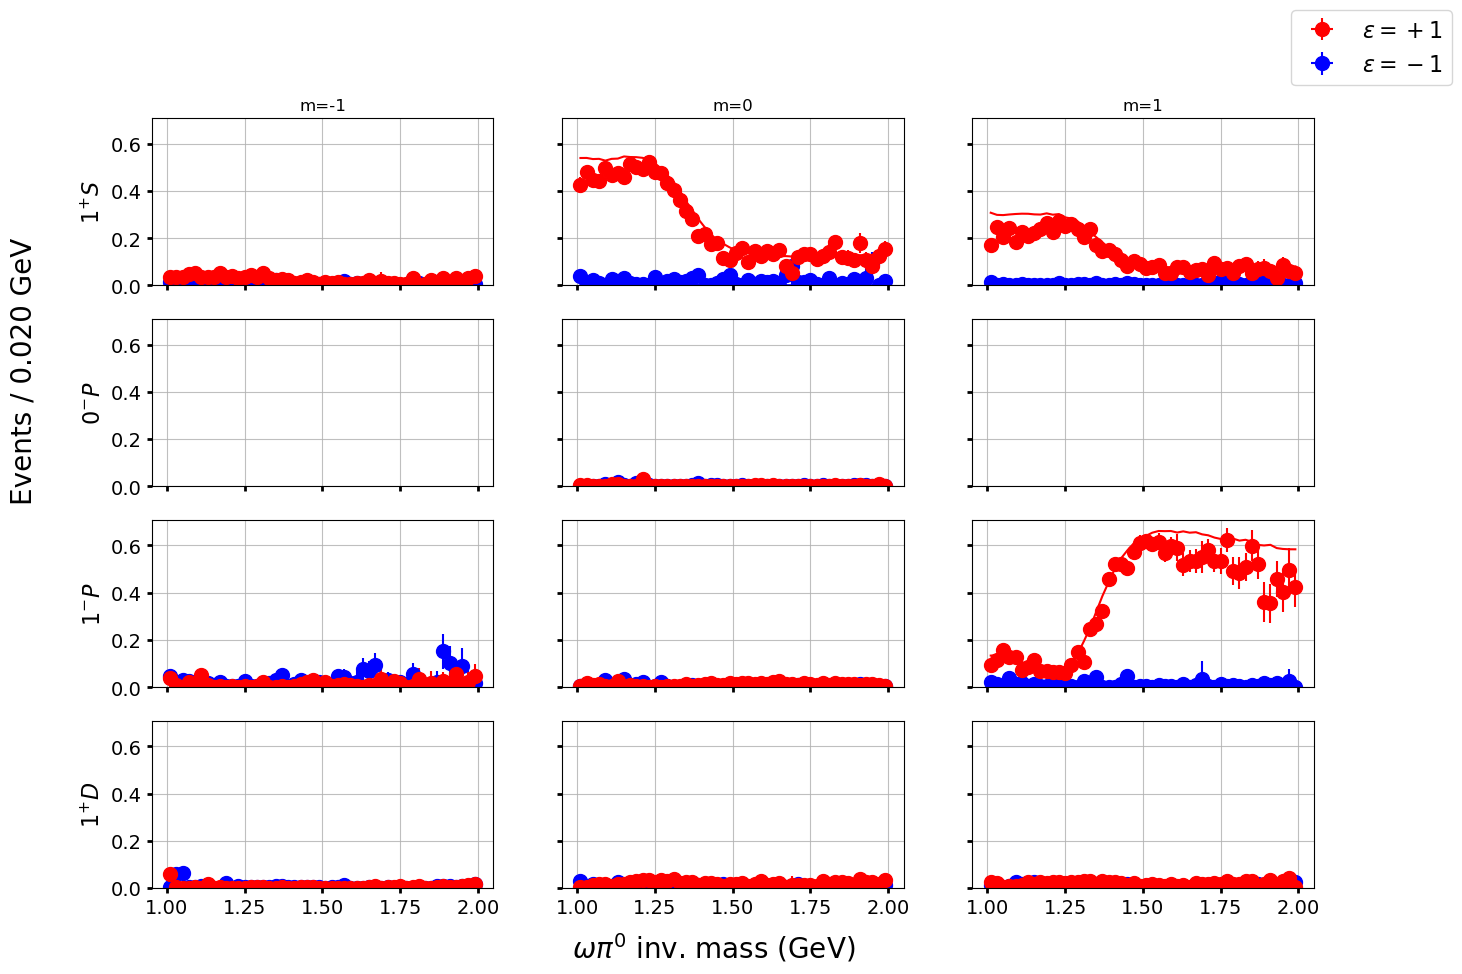

In [2]:
data_path = f"{parent_dir}/analysis/input-output-tests/0m_1m_1p/mcaccept_noaccidental"

df = pd.read_csv(f"{data_path}/best_accept_noaccidental_fits.csv", index_col="index")
df_data = pd.read_csv(f"{data_path}/accept_noaccidental_data.csv")
df_truth = pd.read_csv(f"{data_path}/truth.csv")

plotter = pwa_tools.Plotter(df, df_data, truth_df=df_truth)
plotter.jp()
plotter.intensities()
plotter.intensities(True, True)

## Truth-Initialized Fits
Surprisingly these fits also have issues. Lets try the truth initialized version to see if its a randomization issue.

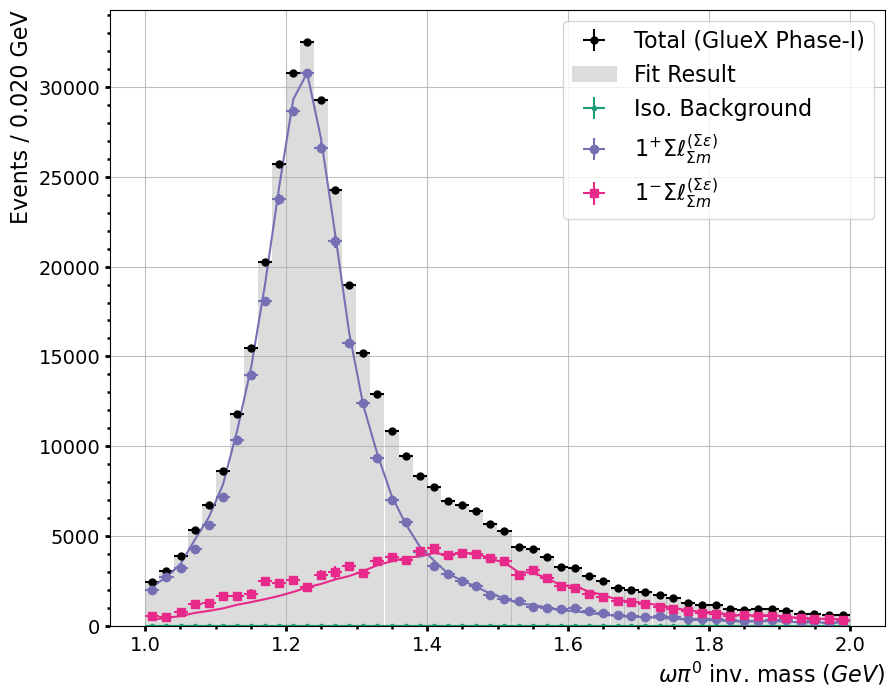

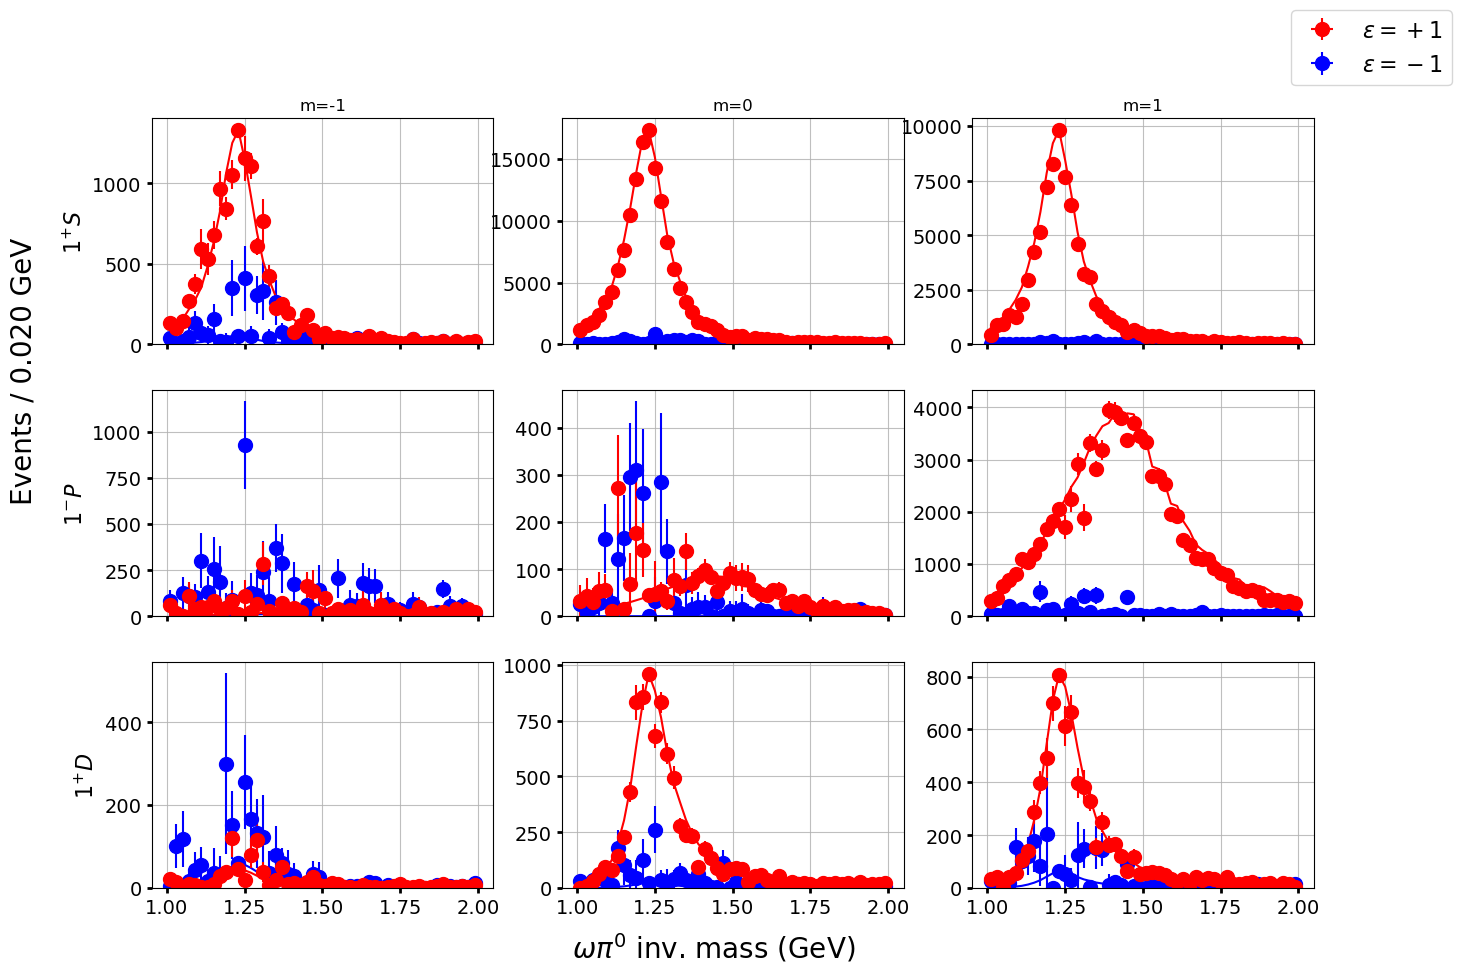

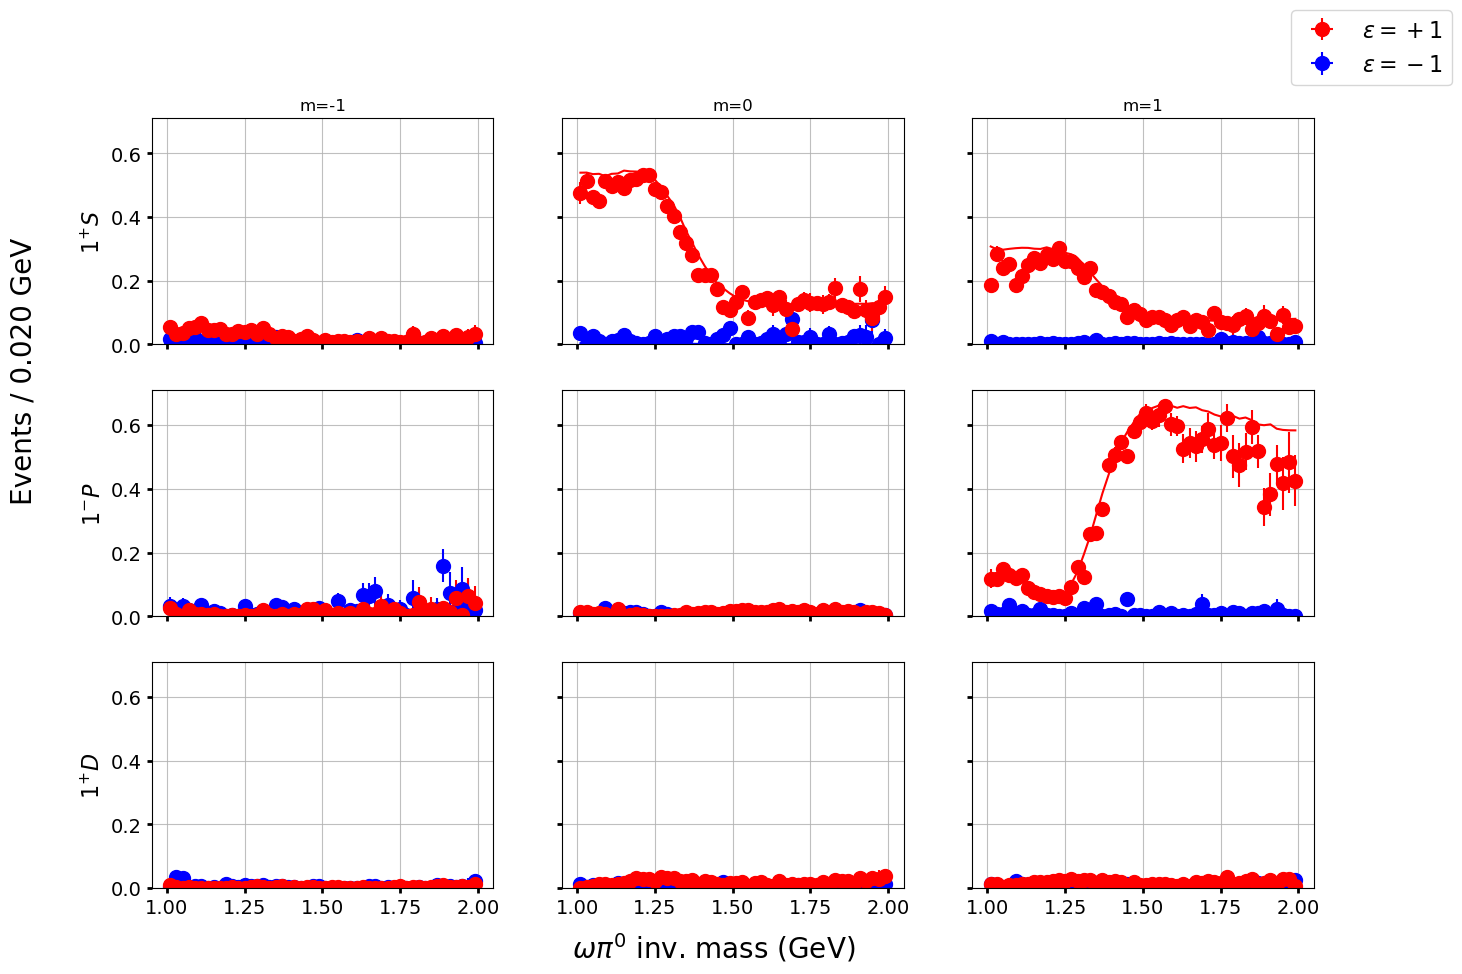

In [3]:
df_truth_init = pd.read_csv(f"{data_path}/truth_init.csv")
plotter_init = pwa_tools.Plotter(df_truth_init, df_data, truth_df=df_truth)

plotter_init.jp()
plotter_init.intensities()
plotter_init.intensities(is_fit_fraction=True, sharey=True)